## FIFA 19 Analysis

In [40]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

### Data Import

In [3]:
df = pd.read_csv('./data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Data exploration

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
# Dropping some Columns on which I will not work on.
df1 = df.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo','Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight'], 1) 

In [6]:
# convert the rest of of the names to a specific structure I want 
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### Data exploration

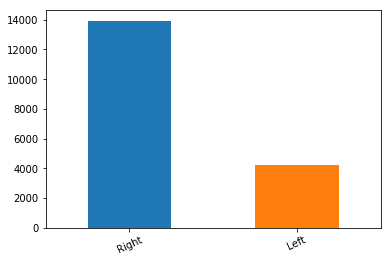

In [7]:
# viewing the number of right footed players vs left footed players
df1.preferred_foot.value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

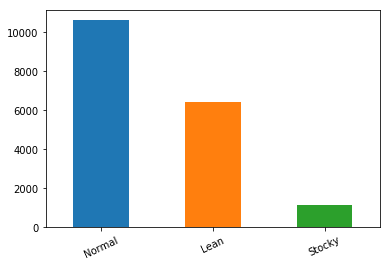

In [8]:
# Viewing the count of each body type
df1.body_type.value_counts().head(3).plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

### Getting to know the highest missing  values columns

In [9]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})

In [10]:
missing_value_df.sort_values('percent_missing', inplace=True , ascending= False)

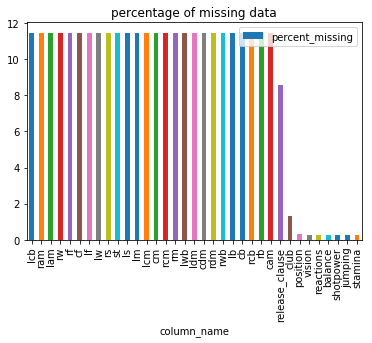

In [11]:
# Highest 35 columns with missing values
missing_value_df[:35].plot.bar("column_name","percent_missing")
plt.title("percentage of missing data");

In [12]:
df1 = df1.loc[:, df1.isnull().mean() < .02] # drop columns with more with more than 2 %

In [13]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})

In [14]:
missing_value_df.sort_values('percent_missing', inplace=True , ascending= False)

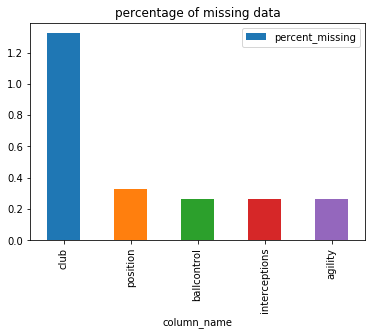

In [15]:
missing_value_df[:5].plot.bar("column_name","percent_missing")
plt.title("percentage of missing data");

####  All columns now with more than 2 % are dropped, now I will drop any row having nan value

In [16]:
((df1.isnull().sum()/df1.count())*100)

name                        0.000000
age                         0.000000
nationality                 0.000000
overall                     0.000000
potential                   0.000000
club                        1.341423
value                       0.000000
wage                        0.000000
special                     0.000000
preferred_foot              0.264332
international_reputation    0.264332
weak_foot                   0.264332
skill_moves                 0.264332
work_rate                   0.264332
body_type                   0.264332
position                    0.330633
crossing                    0.264332
finishing                   0.264332
headingaccuracy             0.264332
shortpassing                0.264332
volleys                     0.264332
dribbling                   0.264332
curve                       0.264332
fkaccuracy                  0.264332
longpassing                 0.264332
ballcontrol                 0.264332
acceleration                0.264332
s

In [17]:
df1.dropna(inplace= True) # drop any row with nan value

### Average overall of the top 20 clubs

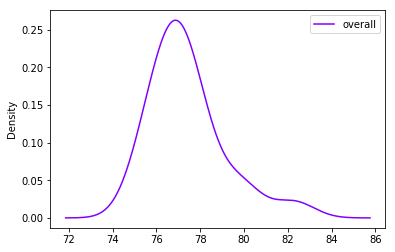

In [18]:
strongest_clubs = df1.groupby("club").mean()["overall"].sort_values(ascending = False)
strongest_20_mean = strongest_clubs[:20]
strongest_20_mean.plot(kind = "density",colormap ="rainbow",legend = True)

### Top 5 Clubs

In [68]:
def BARH(column_name,ascending = True):
    """
    function to plot Horizontal Bars
    input:
        column_name : the name of the column I want to plot
        ascending : Boolean to plot the value ascending if true, descending if false
    outout
        The Plot
        
    """
    strongest_clubs = df1.groupby("club").mean()[column_name].sort_values(ascending = ascending)
    strongest_clubs_mean = strongest_clubs[:5]
    strongest_clubs_mean.plot(kind = "barh",colormap ="rainbow",legend = True)

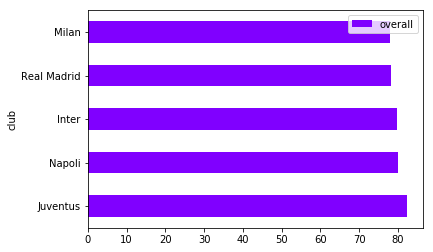

In [69]:
BARH("overall",ascending=False)

In [346]:
#df1.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'position',
       'crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys',
       'dribbling', 'curve', 'fkaccuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprintspeed', 'agility', 'reactions', 'balance',
       'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes'],
      dtype='object')

### Investigate which team have the youngest players

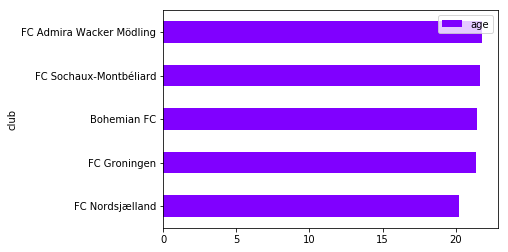

In [72]:
BARH("age",ascending= True)

### Investigating the Player Wages and Values

In [348]:
# checking the value of the players
# We can see that 1/3 value is in millions while 2/3 is in thousand
np.sum(df1["value"].str[-1] == "K"),np.sum(df1["value"].str[-1] == "M")

(11060, 6847)

In [349]:
# checking the wages of the players
# all of them earn in thousands
np.sum(df1["wage"].str[-1] == "K"),np.sum(df1["wage"].str[-1] == "M")

(17918, 0)

In [350]:
# Convert all the player values and wages to be in thousands
# Converting their string values to numerical 
df1['value'] = df1['value'].str.replace('€','').str.replace('K','').str.replace('M','000')
df1["wage"] = df1["wage"].str.replace('€','').str.replace('K','')
df1['wages_in_K'] = df1["wage"].astype(float)
df1["value_in_K"] = pd.to_numeric(df1["value"],downcast="float")

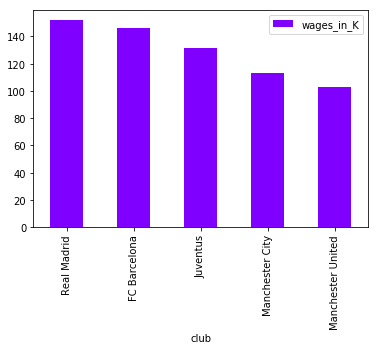

In [353]:
strongest_clubs = df1.groupby("club").mean()["wages_in_K"].sort_values(ascending = False)
strongest_clubs_mean = strongest_clubs[:5]
strongest_clubs_mean.plot(kind = "bar",colormap ="rainbow",legend = True)

In [316]:
df1.drop(["wage","value"],1)
df1.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'position',
       'crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys',
       'dribbling', 'curve', 'fkaccuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprintspeed', 'agility', 'reactions', 'balance',
       'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes', 'wages_in_K',
       'value_in_K'],
      dtype='object')

### Investigating the relation between the player Market value and Wages

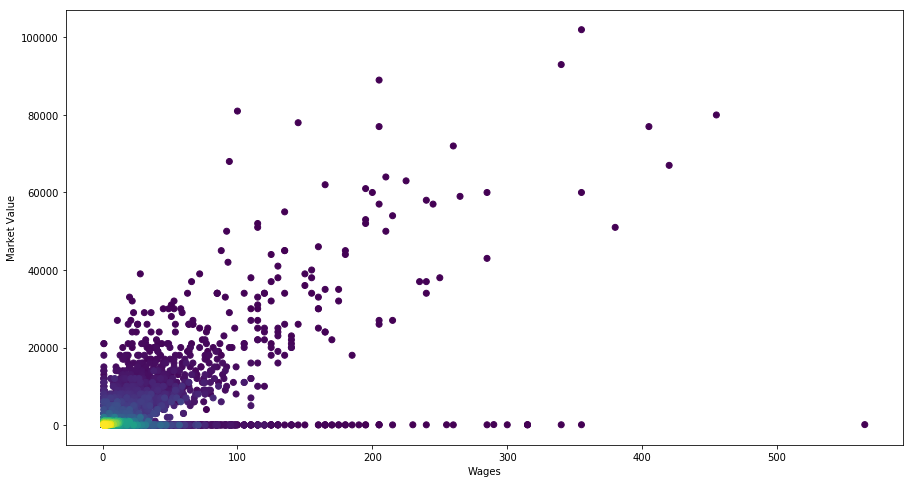

In [358]:
sequence = np.arange(17918)
fig = plt.figure(figsize=(15,8))
plt.scatter(df1["wages_in_K"],df1["value_in_K"], c = sequence)
plt.xlabel('Wages')
plt.ylabel('Market Value')
plt.show()


### Investigate what features have the highest effect on the player wage

In [318]:
df1["position"].nunique()

27

In [319]:
# I will drop his name value and wage as name has no effect. Moreover the value and wage column are converted to
# numerical values and stored in another column 
df1 = df1.drop(["name",'value', 'wage','work_rate', 'body_type'], axis=1)

In [320]:
# cheking the categorical columns so that we can convert them to numerical values 
# to be able to feed them to the model
cat_vars_int = df1.select_dtypes(include=['object']).copy().columns
cat_vars_int

Index(['nationality', 'club', 'preferred_foot', 'position'], dtype='object')

In [321]:
for var in  cat_vars_int:
    # for each cat add dummy var, drop original column
    df1 = pd.concat([df1.drop(var, axis=1), pd.get_dummies(df1[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [322]:
#  wages is my target to putting it in a different variable 
# droping some variables which might affect the model 
y = df1['wages_in_K']
X = df1.drop(['value_in_K', 'wages_in_K', 'potential', 'overall'], axis=1)

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=650)
forest_regressor.fit(X_train, y_train)
y_test_preds = forest_regressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.876770673201048
4.542596945442377


In [367]:
coefs_df = pd.DataFrame()
coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = forest_regressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(5)

,Features,Coefs
14,ballcontrol,0.284335
18,reactions,0.186419
0,age,0.181473
32,standingtackle,0.067176
38,gkreflexes,0.027845


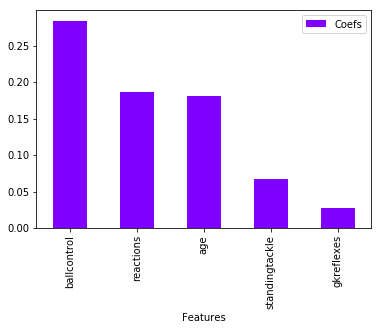

In [368]:
# plot the highest co-offecients
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', colormap ="rainbow")